In [1]:
# Check GPU availability
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

# Check RAM availability
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('Not using a high-RAM runtime')
else:
    print('You are using a high-RAM runtime!')


Thu Jun 27 09:21:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   43C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Installer les bibliothèques nécessaires
!pip install ultralytics roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x8

In [3]:
# Importer et télécharger le dataset de Roboflow
from roboflow import Roboflow
from google.colab import userdata

In [4]:
# Assurez-vous que votre clé API Roboflow est correctement configurée
api_key = userdata.get('YOUR_ROBOFLOW_API_KEY')
if not api_key:
    print('API KEY Not Fund')

In [5]:
rf = Roboflow(api_key=api_key)
project = rf.workspace("roboflow-universe-projects").project("fall-detection-ca3o8")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.45, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fall-Detection-4 in yolov8:: 100%|██████████| 21586/21586 [00:02<00:00, 7205.18it/s]


In [6]:
# Maintenant, vous pouvez continuer avec l'entraînement du modèle YOLOv8 comme suit
from ultralytics import YOLO


In [7]:
# Charger le modèle YOLOv8 pré-entraîné
model = YOLO('yolov8n.pt')


100%|██████████| 6.23M/6.23M [00:00<00:00, 438MB/s]


In [9]:
# List files in the dataset directory to check structure
!ls /content/Fall-Detection-4/


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [10]:
# Affichez le contenu du fichier data.yaml
with open('/content/Fall-Detection-4/data.yaml', 'r') as file:
    data_yaml = file.read()
    print(data_yaml)


names:
- Fall-Detected
nc: 1
roboflow:
  license: CC BY 4.0
  project: fall-detection-ca3o8
  url: https://universe.roboflow.com/roboflow-universe-projects/fall-detection-ca3o8/dataset/4
  version: 4
  workspace: roboflow-universe-projects
test: ../test/images
train: Fall-Detection-4/train/images
val: Fall-Detection-4/valid/images



In [11]:
!ls /content/Fall-Detection-4/valid/images

people-1007-_jpg.rf.6ac861f16af406893559207eaba407c8.jpg
people-1008-_jpg.rf.f05a1c3b1f08487461e99b398a32cf16.jpg
people-1029-_jpg.rf.0f3a8273490f80c1cbb079f56c83e62d.jpg
people-1036-_jpg.rf.f751644562b51e6b942d16564617c0fa.jpg
people-1037-_jpg.rf.3c0278912db3697e4c8f5e4e4ec6e66a.jpg
people-1042-_jpg.rf.48ec488c622c3e895a0cfe9e6131384f.jpg
people-1043-_jpg.rf.cd8473572a00bc53287a3bf38b8ed957.jpg
people-1044-_jpg.rf.4d29ff13d6102dc442d821a9bcf74f5a.jpg
people-1053-_jpg.rf.99eaef7ad9fe174acdfe9af3a8e7c723.jpg
people-1057-_jpg.rf.cb0ef2633797116dc33f7bb86149aa1f.jpg
people-1082-_jpg.rf.9377bd8c493c026eb5d50180d9110a31.jpg
people-108-_jpg.rf.013aefd15bc0d2872d02d8ec456b9e06.jpg
people-1099-_jpg.rf.cf1ddbf71f7ce58798685f341785da36.jpg
people-10-_jpg.rf.e0f6fa76f4bd280e45efdde694a38868.jpg
people-1102-_jpg.rf.81fcde98529aca4ae8319a8b44510150.jpg
people-1106-_jpg.rf.3b0649907a316b131eee81f15eacaf37.jpg
people-1112-_jpg.rf.db5c6e0bb0b7df7175539693a1c9a4be.jpg
people-111-_jpg.rf.b588d39d733f845

In [12]:
# Corrigez les chemins dans le fichier data.yaml
data_yaml_content = """
names:
- Fall-Detected
nc: 1
roboflow:
  license: CC BY 4.0
  project: fall-detection-ca3o8
  url: https://universe.roboflow.com/roboflow-universe-projects/fall-detection-ca3o8/dataset/4
  version: 4
  workspace: roboflow-universe-projects
test: /content/Fall-Detection-4/test/images
train: /content/Fall-Detection-4/train/images
val: /content/Fall-Detection-4/valid/images
"""

with open('/content/Fall-Detection-4/data.yaml', 'w') as file:
    file.write(data_yaml_content)

In [13]:
# Entraîner le modèle sur votre dataset téléchargé
model.train(data=dataset.location + '/data.yaml', epochs=50)


Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Fall-Detection-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 125MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Fall-Detection-4/train/labels... 9438 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9438/9438 [00:06<00:00, 1372.49it/s]


train: New cache created: /content/Fall-Detection-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Fall-Detection-4/valid/labels... 899 images, 0 backgrounds, 0 corrupt: 100%|██████████| 899/899 [00:00<00:00, 1040.39it/s]


val: New cache created: /content/Fall-Detection-4/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/590 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
       1/50      2.44G        1.4      2.027      1.738         27        640: 100%|██████████| 590/590 [01:06<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:05<00:00,  5.52it/s]

                   all        899        899      0.392      0.422       0.34      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.39G      1.488      1.857      1.802         30        640: 100%|██████████| 590/590 [00:59<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.20it/s]

                   all        899        899      0.542      0.526      0.518      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.38G      1.463      1.794      1.796         27        640: 100%|██████████| 590/590 [00:58<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.10it/s]


                   all        899        899      0.549      0.505      0.505      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.38G      1.434      1.731      1.763         28        640: 100%|██████████| 590/590 [00:58<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.10it/s]

                   all        899        899       0.63      0.566      0.609      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.38G      1.391       1.66      1.729         30        640: 100%|██████████| 590/590 [00:57<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.18it/s]

                   all        899        899      0.598      0.617      0.629      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.38G       1.36      1.577      1.704         26        640: 100%|██████████| 590/590 [00:57<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.24it/s]

                   all        899        899      0.646       0.65      0.668       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.38G       1.33      1.521      1.678         28        640: 100%|██████████| 590/590 [00:57<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.05it/s]


                   all        899        899      0.656      0.677       0.69       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.38G       1.31      1.482      1.653         34        640: 100%|██████████| 590/590 [00:58<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.22it/s]

                   all        899        899      0.699      0.683      0.744      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.38G      1.282      1.432       1.63         36        640: 100%|██████████| 590/590 [00:57<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.23it/s]


                   all        899        899      0.604      0.661      0.605      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.38G      1.261      1.389      1.616         31        640: 100%|██████████| 590/590 [00:57<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.08it/s]

                   all        899        899      0.742      0.713      0.784      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.38G      1.242      1.352      1.596         32        640: 100%|██████████| 590/590 [00:58<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.28it/s]

                   all        899        899      0.724      0.723      0.778      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.38G      1.233      1.336      1.588         27        640: 100%|██████████| 590/590 [00:57<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.14it/s]


                   all        899        899      0.683      0.723      0.751      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.38G       1.22      1.321      1.581         40        640: 100%|██████████| 590/590 [00:57<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.36it/s]

                   all        899        899      0.702      0.703      0.738      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.38G      1.213      1.281      1.571         28        640: 100%|██████████| 590/590 [00:57<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.33it/s]

                   all        899        899      0.761      0.769      0.815      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.38G      1.188      1.245      1.553         29        640: 100%|██████████| 590/590 [00:57<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.31it/s]


                   all        899        899      0.735      0.773      0.798      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.38G      1.192       1.24      1.551         38        640: 100%|██████████| 590/590 [00:57<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.44it/s]

                   all        899        899      0.784      0.749      0.818      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.38G      1.183      1.221      1.544         32        640: 100%|██████████| 590/590 [00:57<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.28it/s]

                   all        899        899      0.782      0.743      0.818      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G      1.164      1.199      1.532         37        640: 100%|██████████| 590/590 [00:57<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.43it/s]

                   all        899        899       0.78      0.742      0.811      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.38G      1.154      1.173      1.521         36        640: 100%|██████████| 590/590 [00:58<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.30it/s]

                   all        899        899       0.77      0.792      0.834       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.38G      1.153      1.173       1.52         35        640: 100%|██████████| 590/590 [00:57<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.23it/s]

                   all        899        899      0.728      0.783      0.813      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.38G       1.14      1.152       1.51         31        640: 100%|██████████| 590/590 [00:57<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.41it/s]

                   all        899        899      0.782      0.772      0.829      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.38G      1.134      1.138      1.503         27        640: 100%|██████████| 590/590 [00:57<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.02it/s]

                   all        899        899      0.771      0.783      0.841      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.38G      1.115      1.108      1.484         39        640: 100%|██████████| 590/590 [00:57<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.35it/s]

                   all        899        899      0.793      0.764      0.836      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G      1.109      1.098      1.485         23        640: 100%|██████████| 590/590 [00:57<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.19it/s]

                   all        899        899      0.783      0.791      0.842      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.38G        1.1      1.084      1.476         32        640: 100%|██████████| 590/590 [00:57<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.14it/s]

                   all        899        899      0.782      0.802      0.844       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.38G      1.089      1.075      1.466         35        640: 100%|██████████| 590/590 [00:58<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.39it/s]

                   all        899        899      0.812      0.795      0.857      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.38G      1.082       1.05      1.454         33        640: 100%|██████████| 590/590 [00:57<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.42it/s]

                   all        899        899      0.811      0.805      0.869      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.38G      1.068      1.024      1.444         23        640: 100%|██████████| 590/590 [00:57<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.32it/s]

                   all        899        899      0.829      0.783       0.86      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.38G      1.061      1.029      1.437         38        640: 100%|██████████| 590/590 [00:57<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.25it/s]

                   all        899        899      0.805      0.798      0.866      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.38G      1.058      1.011      1.439         30        640: 100%|██████████| 590/590 [00:58<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.53it/s]

                   all        899        899      0.777      0.824      0.858      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.38G      1.042       0.99      1.423         37        640: 100%|██████████| 590/590 [00:57<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.52it/s]

                   all        899        899      0.834      0.784      0.864      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.38G      1.046     0.9877      1.422         32        640: 100%|██████████| 590/590 [00:57<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.27it/s]


                   all        899        899      0.812      0.828      0.861      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.38G      1.027     0.9697      1.416         28        640: 100%|██████████| 590/590 [00:57<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.26it/s]


                   all        899        899      0.819      0.804      0.866       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.38G      1.029     0.9673      1.412         32        640: 100%|██████████| 590/590 [00:57<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.32it/s]

                   all        899        899      0.815      0.814      0.876      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.38G      1.007     0.9517        1.4         32        640: 100%|██████████| 590/590 [00:57<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.41it/s]

                   all        899        899      0.817      0.819      0.865      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.38G      1.009     0.9327      1.392         23        640: 100%|██████████| 590/590 [00:57<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.36it/s]

                   all        899        899      0.813       0.82      0.874      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.38G     0.9973     0.9169      1.388         26        640: 100%|██████████| 590/590 [00:57<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.15it/s]

                   all        899        899      0.795      0.838       0.87       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.38G     0.9919     0.9119      1.386         25        640: 100%|██████████| 590/590 [00:57<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.47it/s]

                   all        899        899      0.802      0.831       0.87      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.38G     0.9782     0.8993      1.378         27        640: 100%|██████████| 590/590 [00:58<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.22it/s]

                   all        899        899      0.832      0.785      0.867      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.38G     0.9653     0.9012       1.37         25        640: 100%|██████████| 590/590 [00:57<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.42it/s]

                   all        899        899      0.838      0.788      0.879       0.53


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.38G     0.9083     0.6364      1.399         14        640: 100%|██████████| 590/590 [00:58<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.22it/s]


                   all        899        899      0.828      0.786      0.871      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.39G     0.8831     0.5867      1.377         14        640: 100%|██████████| 590/590 [00:56<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.44it/s]

                   all        899        899      0.799      0.831      0.874      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.38G     0.8616     0.5641      1.358         14        640: 100%|██████████| 590/590 [00:57<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.47it/s]

                   all        899        899      0.843      0.777      0.868      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.38G     0.8454     0.5575      1.343         14        640: 100%|██████████| 590/590 [00:56<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.38it/s]


                   all        899        899      0.835      0.796      0.867      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.38G     0.8369     0.5382      1.332         14        640: 100%|██████████| 590/590 [00:56<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.30it/s]

                   all        899        899      0.799      0.825      0.868      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.38G     0.8211     0.5193      1.319         14        640: 100%|██████████| 590/590 [00:56<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.40it/s]

                   all        899        899      0.816      0.832      0.875      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.38G     0.8072     0.5132       1.31         13        640: 100%|██████████| 590/590 [00:56<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.39it/s]

                   all        899        899      0.813      0.839      0.875      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.39G     0.7958     0.4971      1.295         14        640: 100%|██████████| 590/590 [00:57<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.28it/s]


                   all        899        899       0.82      0.829      0.875      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.38G     0.7798     0.4864      1.279         14        640: 100%|██████████| 590/590 [00:56<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.47it/s]

                   all        899        899      0.827      0.804      0.868      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.39G     0.7724     0.4763      1.278         14        640: 100%|██████████| 590/590 [00:56<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.44it/s]

                   all        899        899      0.827      0.814      0.874      0.544



50 epochs completed in 0.870 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:05<00:00,  5.15it/s]


                   all        899        899      0.813      0.835      0.875      0.544
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c09996bce50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
# Exemple de prédiction avec une image téléchargée
import requests
from PIL import Image
from io import BytesIO

In [15]:
# Télécharger une image de chute pour la prédiction
url = 'https://oppq.qc.ca/wp-content/uploads/Reduire-le-risque-de-chute-chez-personnes-agees.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.save('fall_image.jpg')

In [17]:
# Prédiction avec l'image téléchargée
results = model.predict(source='fall_image.jpg', conf=0.65)


image 1/1 /content/fall_image.jpg: 448x640 1 Fall-Detected, 15.2ms
Speed: 5.3ms preprocess, 15.2ms inference, 3.3ms postprocess per image at shape (1, 3, 448, 640)


In [21]:
# Télécharger une image sans chute pour la prédiction
url = 'https://www.slate.fr/uploads/store/story_182757/large_landscape_182757.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.save('walk_image.jpg')

In [22]:
# Prédiction avec l'image téléchargée
results = model.predict(source='walk_image.jpg', conf=0.65)


image 1/1 /content/walk_image.jpg: 384x640 (no detections), 145.9ms
Speed: 3.4ms preprocess, 145.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


In [23]:
# Afficher les résultats de la prédiction
for result in results:
    result.plot()  # Utilisez plot() pour afficher les résultats

In [24]:
# Afficher les résultats dans un format lisible
from IPython.display import Image as IPyImage, display

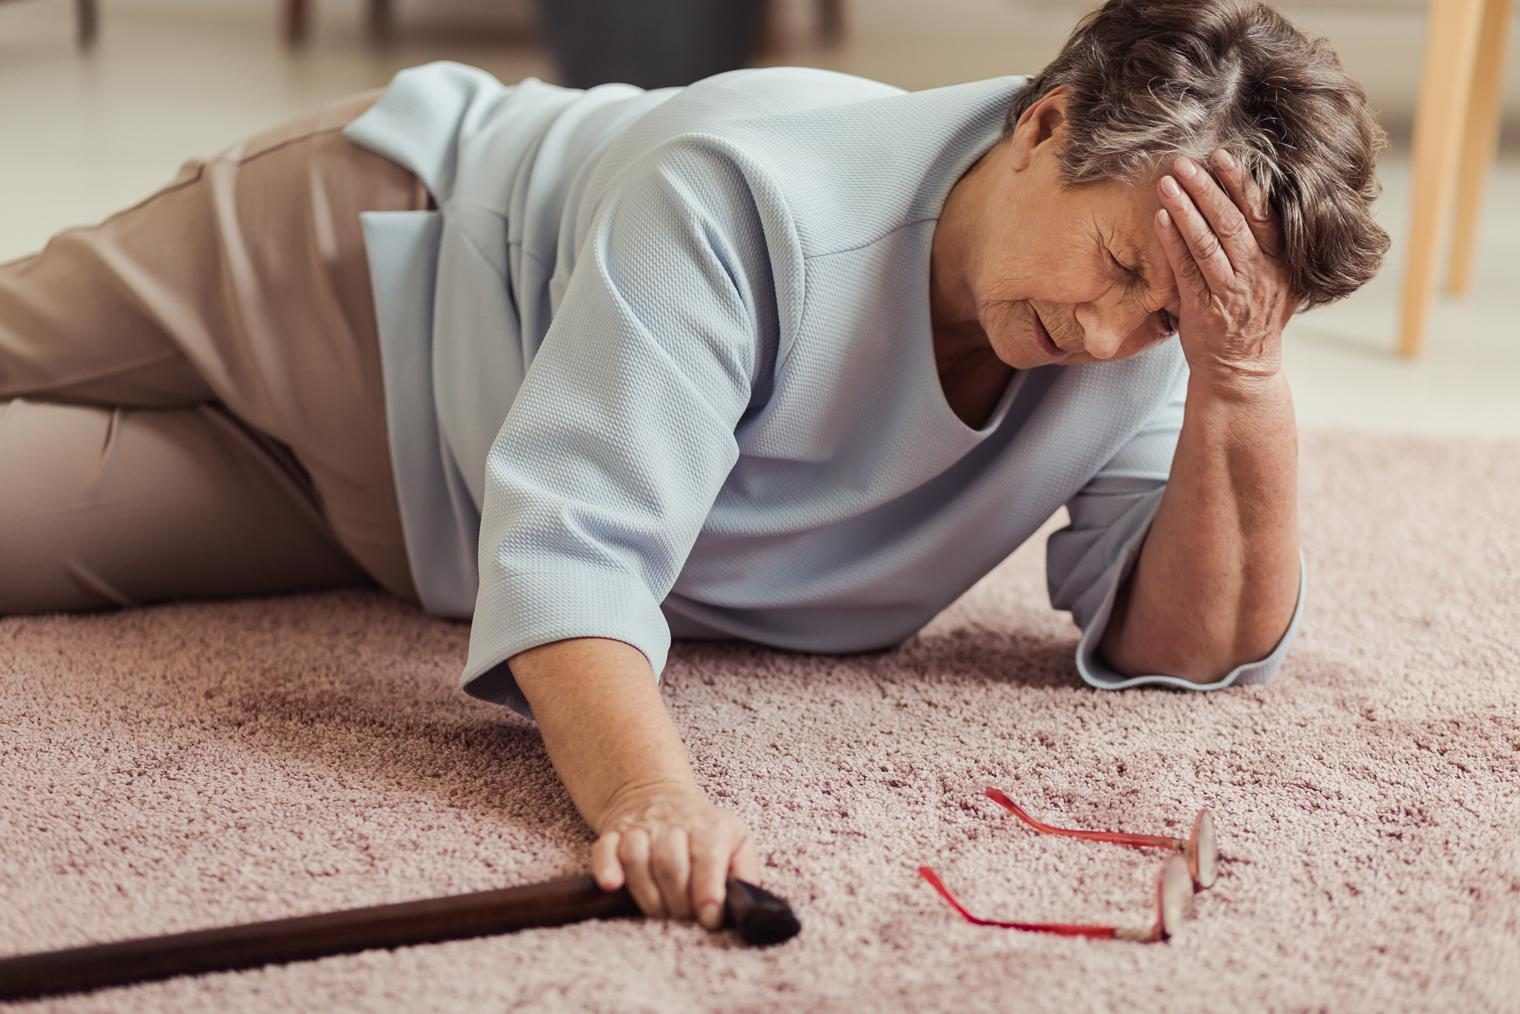

In [25]:
display(IPyImage('fall_image.jpg'))

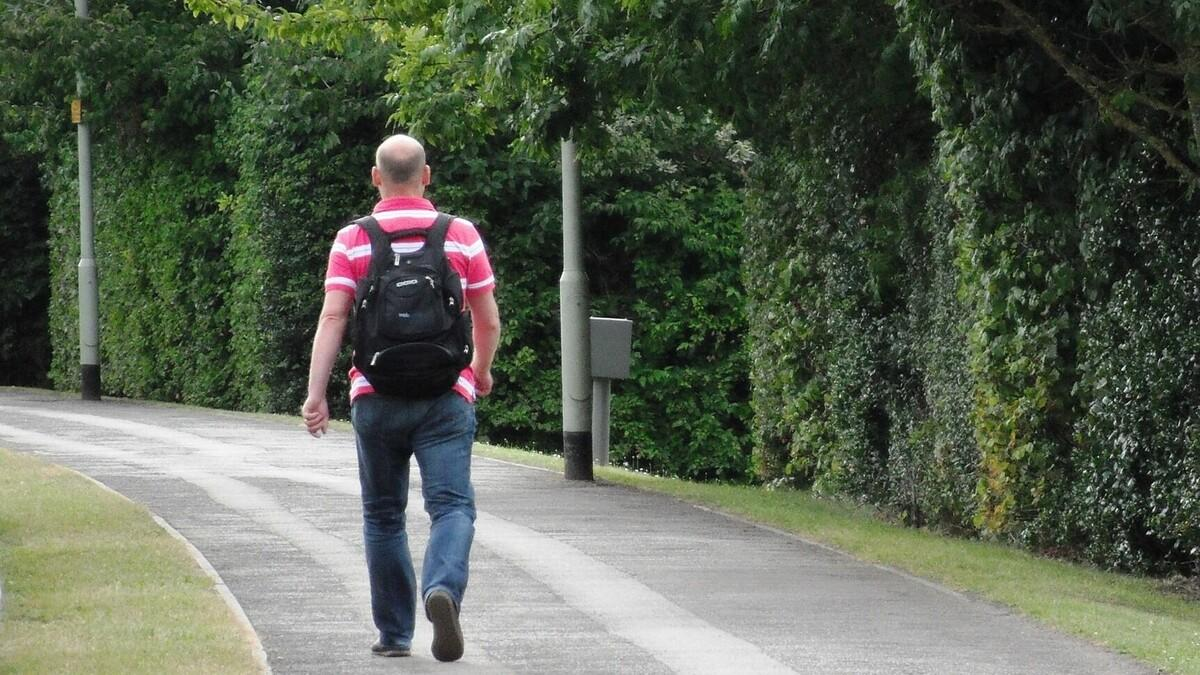

In [26]:
display(IPyImage('walk_image.jpg'))